In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
data = pd.read_csv('energy consumption.csv')
data.head()


,DATE,ENERGY_INDEX
0,01/1939,3.3842
1,02/1939,3.4100
2,03/1939,3.4875
3,04/1939,3.5133
4,05/1939,3.5133


In [5]:
data.shape


(969, 2)

In [9]:
data['DATE'] = pd.to_datetime(data['DATE'])
data.head()


,DATE,ENERGY_INDEX
0,1939-01-01,3.3842
1,1939-02-01,3.4100
2,1939-03-01,3.4875
3,1939-04-01,3.5133
4,1939-05-01,3.5133


In [16]:
12*(data['DATE'].max().year - data['DATE'].min().year) + \
    (data['DATE'].max().month - data['DATE'].min().month)


968

No missing values!

In [17]:
data.set_index('DATE', inplace=True)


In [18]:
data.head()


,ENERGY_INDEX
DATE,
1939-01-01,3.3842
1939-02-01,3.4100
1939-03-01,3.4875
1939-04-01,3.5133
1939-05-01,3.5133


In [32]:
data.tail()

,ENERGY_INDEX
DATE,
2019-05-01,91.9046
2019-06-01,98.4397
2019-07-01,112.9469
2019-08-01,111.6645
2019-09-01,102.2911


<AxesSubplot: xlabel='DATE'>

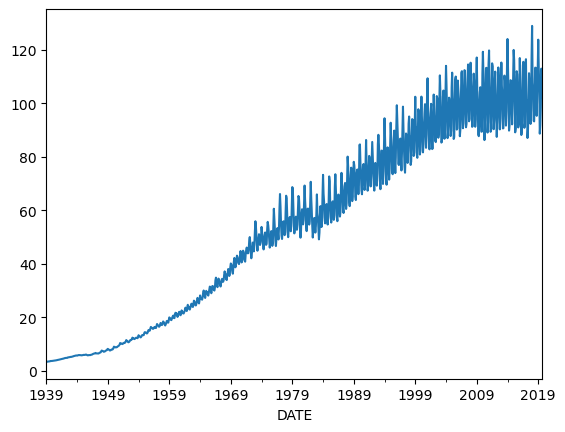

In [19]:
data['ENERGY_INDEX'].plot()


In [21]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [22]:
decom_data = seasonal_decompose(data['ENERGY_INDEX'])


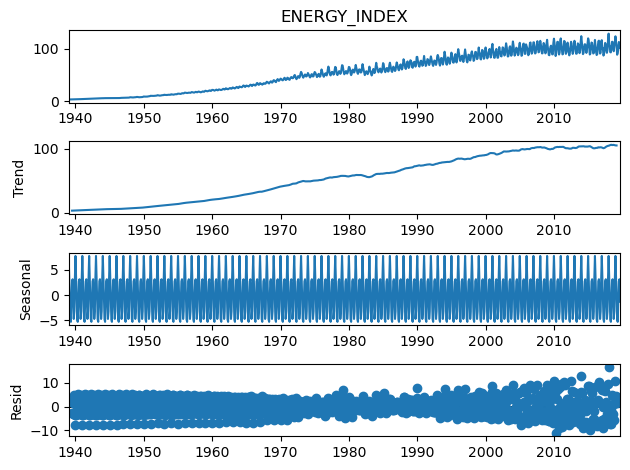

In [24]:
decom_data.plot()


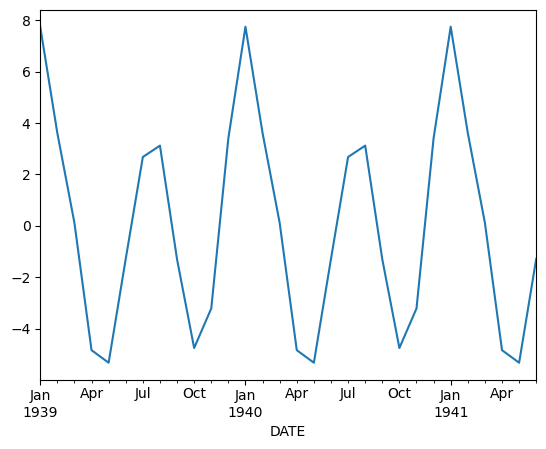

In [25]:
decom_data.seasonal[0:30].plot()


We have an yearly seasonality

In [26]:
from statsmodels.tsa.api import ExponentialSmoothing


In [45]:
model = ExponentialSmoothing(np.asarray(
    data['ENERGY_INDEX']), seasonal_periods=12, trend='add', seasonal='mul')
model = model.fit()

In [59]:
index = pd.date_range(start = '2019-10-01', periods = 36, freq = 'MS')

In [60]:
predicted = pd.DataFrame(index = index)

In [61]:
predicted['ENERGY_INDEX'] = model.forecast(36)

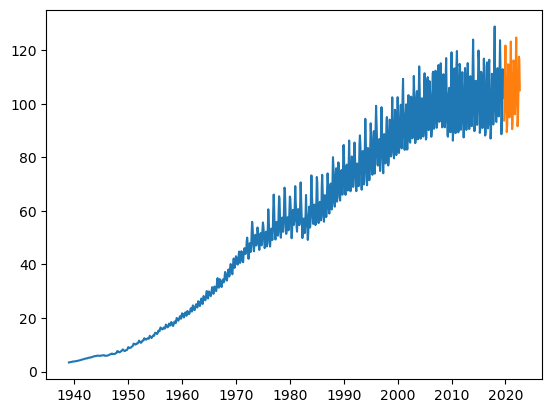

In [62]:
plt.figure
plt.plot(data['ENERGY_INDEX'])
plt.plot(predicted['ENERGY_INDEX'])
plt.show()

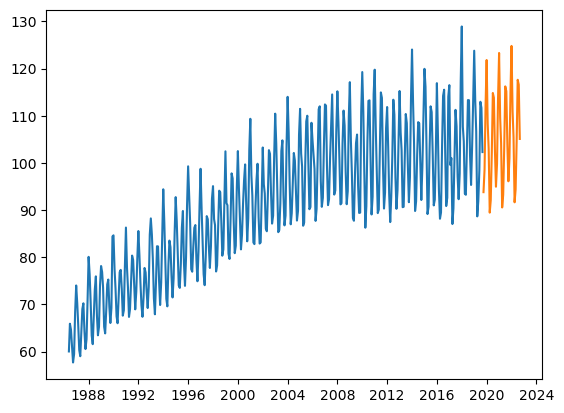

In [63]:
plt.figure
plt.plot(data['ENERGY_INDEX'][-400:])
plt.plot(predicted['ENERGY_INDEX'])
plt.show()


In [64]:
model.params

{'smoothing_level': 0.3945798312276448,
 'smoothing_trend': 3.1013110526707804e-14,
 'smoothing_seasonal': 0.29903128061033707,
 'damping_trend': nan,
 'initial_level': 3.09702045958046,
 'initial_trend': 0.11112333049109183,
 'initial_seasons': array([1.05206385, 1.02488108, 1.0097932 , 1.0001616 , 0.99749411,
        1.01147206, 1.02433292, 1.04079273, 1.05952928, 1.06783549,
        1.07948849, 1.07458903]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}